# IS 4487 Assignment 18: Exploring APIs with yfinance

In this assignment, you will:
- Choose an industry you're interested in (such as tech, airlines, or retail)
- Use the `yfinance` Python package as an API to collect historical stock price data
- Clean and prepare the data for analysis
- Explore trends, volatility, and relationships between companies
- Summarize your findings and recommendation in a business memo

## Why This Matters

APIs (Application Programming Interfaces) allow businesses to pull live, real-world data from external sources directly into their analytics tools. Financial analysts, investment firms, and business leaders use APIs like `yfinance` to monitor company performance, assess market trends, and build models based on dynamic data.

This assignment helps you gain hands-on experience with one of the most common API workflows in business analytics: fetching, cleaning, analyzing, and interpreting financial data to support better decision-making.

<a href="https://colab.research.google.com/github/Stan-Pugsley/is_4487_base/blob/main/Assignments/assignment_14_api.ipynb" target="_parent">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>



## Step 1: Choose an Industry and Find Company Ticker Symbols

Visit the following website to explore U.S. stock sectors and industries:  
https://www.tradingview.com/markets/stocks-usa/sectorandindustry-sector/

Choose one industry you are interested in (for example: Airlines, Technology, Fast Food, Retail, Energy, etc.).  
Write the names and ticker symbols of 4 public companies in that industry.

**Example:**
- Industry: Technology  
- Tickers: AAPL, MSFT


In [1]:
# Replace this list with your selected tickers
tickers = ['DAL', 'UAL', 'LUV', 'AAL']

## Step 2: Use yfinance to Collect Historical Stock Data

Follow the steps below to use the `yfinance` API to collect historical stock price data.

### Instructions

1. Make sure the `yfinance` package is installed by running the code cell below.
2. Import any additional Python libraries that you might need to explore or visualize the data.
3. Use the `yf.download()` function to pull **5 years of daily adjusted close prices** for the companies you selected in Step 1.
    - Choose a start date and an end date that span the past 5 years (e.g., `"2020-01-01"` to `"2025-12-31"`).
    - Only select the **'High'** column, which represents the daily high
4. Preview the first few rows of the dataset using `.head()` to confirm that the data has loaded correctly.



In [2]:
# Import necessary libraries
!pip install yfinance

import yfinance as yf
import pandas as pd

In [3]:
# Download adjusted close prices
df = yf.download(tickers, start="yyyy-mm-dd", end="yyyy-mm-dd")['High']

/tmp/ipython-input-4006193946.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(tickers, start="yyyy-mm-dd", end="yyyy-mm-dd")['High']
[*********************100%***********************]  3 of 4 completed
ERROR:yfinance:
4 Failed downloads:
ERROR:yfinance:['AAL', 'UAL', 'DAL', 'LUV']: ValueError("time data 'yyyy-mm-dd' does not match format '%Y-%m-%d'")
[*********************100%***********************]  3 of 4 completed

In [4]:
df.head()

Ticker,AAL,DAL,LUV,UAL
Date,,,,


## Step 3: Clean the Data

The data you pulled may contain missing values. Follow these steps:

1. Check the dataset for missing values using `.isnull().sum()`.
2. Fill any missing values using a forward fill method.
3. Recheck for missing values to confirm they have been handled.



In [6]:
# Add code here 🔧
print(df.isnull().sum())

df.fillna(method='ffill', inplace=True)

print(df.isnull().sum())

Ticker
AAL    0
DAL    0
LUV    0
UAL    0
dtype: int64
Ticker
AAL    0
DAL    0
LUV    0
UAL    0
dtype: int64


/tmp/ipython-input-1071397201.py:4: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


## Step 4: Calculate Daily Returns

To better understand price movement, calculate the daily percentage change for each stock.

1. Use the `.pct_change()` method to calculate daily returns.
2. Drop any rows with missing values that may result from this calculation.
3. Preview the returns DataFrame to confirm it's correct.


In [7]:
# Add code here 🔧
returns = df.pct_change()
returns.dropna(inplace=True)
returns.head()

Ticker,AAL,DAL,LUV,UAL
Date,,,,


## Step 5: Explore the Data Visually and Statistically

In this step, you will create visualizations and metrics to help understand stock behavior. Don’t interpret or explain anything here — just create the outputs so you can use them in your reflection later.

1. Create a line chart showing stock prices over the 5-year period.
2. Calculate the standard deviation of daily returns for each stock (volatility).
3. Create a correlation matrix of the daily returns between companies.




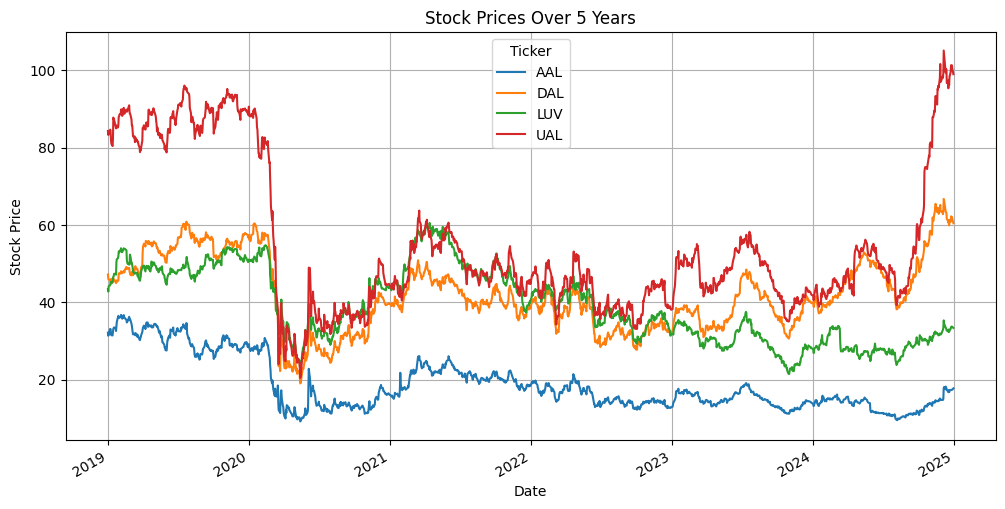

In [17]:
# Add code here 🔧
import matplotlib.pyplot as plt
df.plot(figsize=(12, 6))
plt.title('Stock Prices Over 5 Years')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.grid(True)
plt.legend(title='Ticker')
plt.show()

In [18]:
volatility = returns.std()
print("Volatility (Standard Deviation of Daily Returns):")
print(volatility)

Volatility (Standard Deviation of Daily Returns):
Ticker
AAL    0.037234
DAL    0.027289
LUV    0.022709
UAL    0.034457
dtype: float64


In [19]:
correlation_matrix = returns.corr()
print("Correlation Matrix of Daily Returns:")
print(correlation_matrix)

Correlation Matrix of Daily Returns:
Ticker       AAL       DAL       LUV       UAL
Ticker                                        
AAL     1.000000  0.804086  0.717247  0.809969
DAL     0.804086  1.000000  0.761246  0.896298
LUV     0.717247  0.761246  1.000000  0.716359
UAL     0.809969  0.896298  0.716359  1.000000


## Step 6: Write a Stakeholder Recommendation Memo

Now that you’ve completed your analysis, it’s time to turn your work into a clear, professional memo for a business audience.

### Scenario

You’ve been asked by a stakeholder (an investor, executive, or client) to evaluate whether it's a good time to invest in a particular industry. They’ve asked you to use recent stock performance data from several leading companies in that industry to help guide their decision.

### Your Task

Use the results from your code in Steps 2–5 to write a **multi-paragraph business memo** that:

1. **Introduces the industry you analyzed** and names the companies you included.
2. **Summarizes major trends** you observed in the stock prices over the last 5 years.
3. **Discusses key metrics**, such as volatility and correlations between companies.
4. **Presents your investment recommendation** — based on your evidence — and explains why you would or wouldn’t advise investing in this industry now.
5. **Suggests future analytics or data sources** that could strengthen or update your recommendation going forward.

This final section should show that you understand how real-world decisions evolve. Think about:
- What **additional data** might help (e.g., earnings reports, economic indicators, sentiment analysis)?
- What **types of models** could be applied (e.g., forecasting, classification, risk modeling)?
- How often should the analysis be updated?

### Format & Expectations

- Write **2–4 paragraphs** in business memo format (not bullet points).
- Use **specific, data-driven evidence** from your own analysis.
- Keep your writing professional and clear — imagine your reader is a client or executive, not a data analyst.
- Your memo should be written **entirely in your own words**. Do not copy from examples, online sources, or AI tools. Your writing should reflect your understanding and your interpretation of the results.
- You do not need to include charts in the memo — the code cells above already display them.



### Add memo here:
The industry that I analyzed is the airline industry. I used Delta, United, American, and Southwest airlines. Over the past 5 years, United Airlines started at the highest, and dropped significantly along with the other airlines suring Covid, abut remained the highest throughout the 5 years; once again shooting up in 2025 to significatanly higher than the other airlines. The airline that stays the most level appears to be Delta, though at times interchanges being higher with Soutwest. Despite this, Delta remains at 2025 as being the second highest. The lowest stock price throughout the 5 years belongs to American Airlines.

Some key metrics to note between and of the companies are that the airlines with the highest volatility are American Airlines at 0.037234 and United Airlines 0.034457. The companies with the highest correlations are United Airlines and Delta airlines with a correlation of 0.896298 and United Airlines and American Airlines with a correlation of 0.809969.

Based on the graph and correlation matrix, I would recommend investing in United Airlines and maybe Delta as well. This is because United Airlines consistently has the highest share price even when it drops. Delta is the second one, and is also the highest correlated with United Airlines. However, to make a more informed decision, it would be best to analyze the earnings reports and other economic indicators as well as public sentiment analysis. It would be useful to use regression analysis to predict the stock prices, and using a wide and deep arrange of data to do so. This would allow for continual minorting of stock price.

## Submission Instructions
✅ Checklist:
- All code cells run without error
- All markdown responses are complete
- Submit on Canvas as instructed

In [1]:
!jupyter nbconvert --to html "assignment_14_AndradeLeslie.ipynb"

[NbConvertApp] Converting notebook assignment_14_AndradeLeslie.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 1 image(s).
[NbConvertApp] Writing 462244 bytes to assignment_14_AndradeLeslie.html
